1.Derivation and Analysis

Scenario A: 


$\lambda^* = argmin_x \sum_{i = 1}^n -y_ilog(\frac{1}{1+e^{-x}}) - (1 - y_i)log(1 - \frac{1}{1 + e^{-x}}) = $ 

$=argmin_x (m \cdot -log(\frac{1}{1+e^{-x}}) - k \cdot log(1 - \frac{1}{1 + e^{-x}})) =$


$=argmax_x (m \cdot log(\frac{1}{1+e^{-x}}) + k \cdot log(1 - \frac{1}{1 + e^{-x}})) =$


$=argmax_x (log(\frac{1}{1+e^{-x}})^m + log(1 - \frac{1}{1 + e^{-x}})^k) =$

$=argmax_x (log((\frac{1}{1+e^{-x}})^m \cdot (1 - \frac{1}{1 + e^{-x}})^k)) =$

$=argmax_x ((\frac{1}{1+e^{-x}})^m \cdot (1 - \frac{1}{1 + e^{-x}})^k) $

Podstawmy: $\frac{1}{1+e^{-x}} = z$

$z^* = argmax_z(z^m \cdot (1-z)^k) $

$(z^m \cdot (1-z)^k)' = m \cdot z^{m-1} \cdot (1 - z)^k - z^m \cdot k \cdot (1 -z)^{k-1} = $

$ = z^{m-1} \cdot (1 - z)^{k-1} \cdot (m(1-z) - kz)$

Ponieważ $z \in (0,1)$ to 

$z^{m-1} \cdot (1 - z)^{k-1} \cdot (m(1-z) - kz) \geq 0 \iff (m(1-z) - kz) \geq 0 \iff m \geq mz + kz \iff \frac{m}{m+k} \geq z$

Więc:

$z^* = \frac{m}{m+k}$

$\frac{m}{m+k} = \frac{1}{1 + e^{-\lambda^*}}$

$\lambda^* = -ln(\frac{k}{m})$




Scenario B:
Nie możemy przeprowadzić rozumowania analogicznego do Scenario A, ze względu na to że w funkcji $\sigma(f_i, \lambda) = \frac{1}{1+e^{-f_i-\lambda}}$ przypadki z $y=0$ fundamentalnie różnią się między sobą z powodu różnych wartości $f_i$ (i tak samo dla $y=1$). Nieliniowość funkcji sigmoid nie pozwala nam na 'ominięcie' problemu różnych $f_i$ dla różnych i:  
$\lambda^* = argmin_x \sum_{i = 1}^n -y_ilog(\frac{1}{1+e^{-x-f_i}}) - (1 - y_i)log(1 - \frac{1}{1 + e^{-x-f_i}}) = $

$=argmax_x \sum_{i = 1}^m log(\frac{1}{1+e^{-x-f_i}}) + \sum_{i = m+1}^{m+k} log(1 - \frac{1}{1 + e^{-x-f_i}}) = $

$=argmax_x \prod_{i = 1}^m \frac{1}{1+e^{-x-f_i}} \cdot \prod_{i = m+1}^{m+k} (1 - \frac{1}{1 + e^{-x-f_i}})$


In [1]:
import numpy as np

def sigmoid(z):
    return 1/(1 + np.exp(-z))

m = 1000
k = 800

f_k = np.random.normal(size=(k, ))
f_m = np.random.normal(size=(m, ))

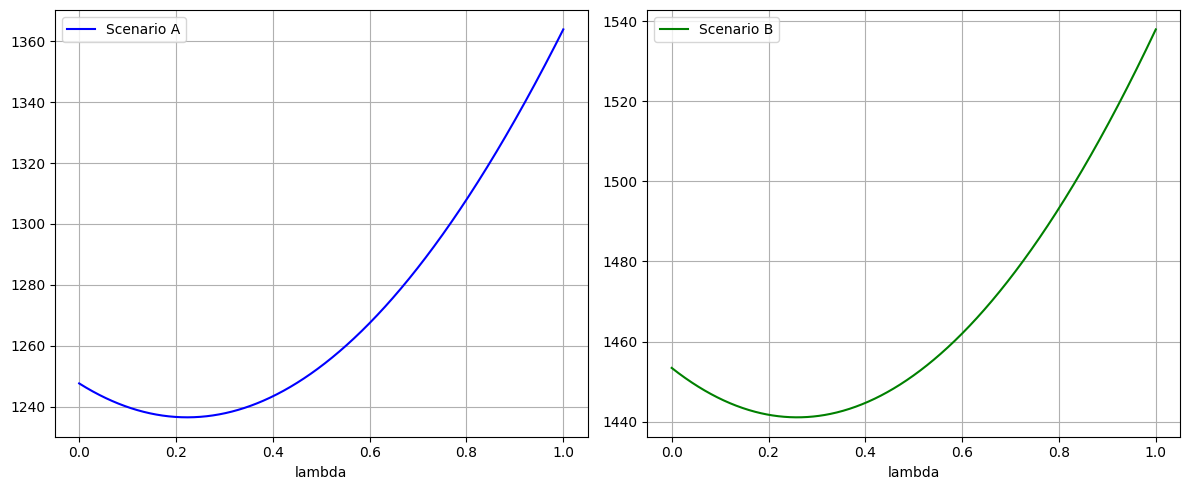

In [2]:
import matplotlib.pyplot as plt

def lossA(l):
    global k, m
    return - m * np.log(sigmoid(l)) - k * np.log(1 - sigmoid(l))

def lossB(l):
    global k, m, f_k, f_m
    
    return -np.sum(np.log(sigmoid(f_m + l))) - np.sum(np.log(1 - sigmoid(f_k + l)))
    
lambda_values = np.linspace(0, 1, 1000)
loss1_values = [lossA(l) for l in lambda_values]
loss2_values = [lossB(l) for l in lambda_values]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(lambda_values, loss1_values, label="Scenario A", color="blue")
axes[0].set_xlabel("lambda")
axes[0].grid(True)
axes[0].legend()

axes[1].plot(lambda_values, loss2_values, label="Scenario B", color="green")
axes[1].set_xlabel("lambda")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

In [3]:
def find_monotonic_segments(values):
    n = len(values)
    result = []
    i = 0

    while i < n - 1:
        j = i
        if values[j] < values[j + 1]:
            while j + 1 < n and values[j] < values[j + 1]:
                j += 1
            result.append((i, j))
            i = j
        elif values[j] > values[j + 1]:
            while j + 1 < n and values[j] > values[j + 1]:
                j += 1
            result.append((i, j))
            i = j
        else:
            i += 1

    return result
find_monotonic_segments(loss2_values)

[(0, 259), (259, 999)]

Widzimy że nasza funkcja straty w scenariuszu B jest zaskakująco "ładna" - jest ona funkcją ściśle malejącą aż do minimum globalnego, a następnie ściśle rosnącą. Przeprowadźmy jeszcze ten eksperyment 100 razy, żeby się upewnić (użyjemy teraz również 'szerszych' przedziałów).

Landscape z scenariuszy A i B wydają się do siebie zbliżone - żaden nie wyróżnia się swoją złożonością.

W scenariuszu B funkcja którą minimalizujemy, jest funkcją gładką, więc oczywiście możemy wyznaczyć minimum globalne numerycznie - nie jest to jednak tak proste jak w punkcie A. Wnioskując jednak po wynikach eksperymentu, sugerowałabym poszukiwanie minimum przy pomocy przeszukiwania binarnego.

In [4]:


def eksperyment():
    f_k = np.random.normal(size=(k, ))
    f_m = np.random.normal(size=(m, ))
    
    def lossB(l):    
        return -np.sum(np.log(sigmoid(f_m + l))) - np.sum(np.log(1 - sigmoid(f_k + l)))
    
    def find_monotonic_segments(values):
        n = len(values)
        result = []
        i = 0
    
        while i < n - 1:
            j = i
            if values[j] < values[j + 1]:
                while j + 1 < n and values[j] < values[j + 1]:
                    j += 1
                result.append((i, j))
                i = j
            elif values[j] > values[j + 1]:
                while j + 1 < n and values[j] > values[j + 1]:
                    j += 1
                result.append((i, j))
                i = j
            else:
                i += 1
    
        return result
    
    lambda_values = np.linspace(-10, 10, 100000)
    loss2_values = [lossB(l) for l in lambda_values]
    segments = find_monotonic_segments(loss2_values)
    
    return segments

all_segments_len_2 = True
for i in range(100):
    if len(eksperyment()) != 2:
        all_segments_len_2 = False
        break

if all_segments_len_2:
    print("Wszystkie eksperymenty były zgodne z tezą")
else:
    print("Znaleziono kontrprzykład")
    

Wszystkie eksperymenty były zgodne z tezą
